
 [ 승률 ] 기준 투수 지표별 상관계수 (절대값)
 승률  <--->  ERA  :  -0.6340 (영향력: 0.6340)
 승률  <--->  FIP  :  -0.4087 (영향력: 0.4087)
 승률  <--->  WHIP :  -0.6128 (영향력: 0.6128)


C:\Users\user\AppData\Local\Temp\ipykernel_19156\463143882.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_val = correlations[i]


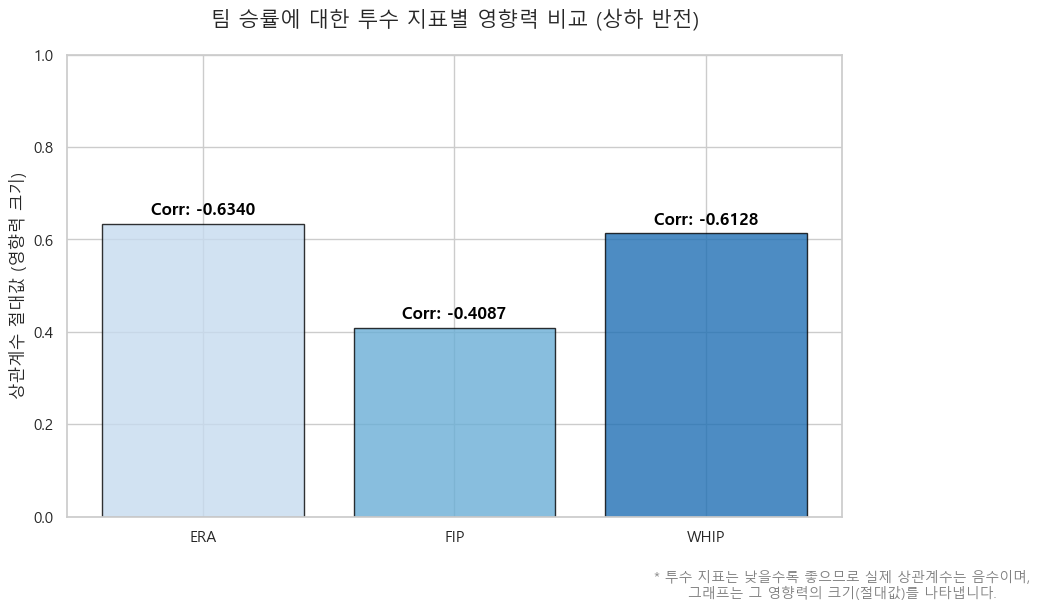

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 스타일 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='Malgun Gothic')

if 'final_master' in locals() or 'final_master' in globals():
    
    # 2. 분석 지표 설정
    target = '승률'
    features = ['ERA', 'FIP', 'WHIP']
    
    # 3. 상관계수 계산 및 절대값 변환 (상하 반전을 위해)
    correlations = final_master[[target] + features].corr()[target].drop(target)
    abs_correlations = correlations.abs() # 음수 값을 양수로 변환하여 막대를 위로 보냄
    
    print("\n" + "="*50)
    print(f" [ {target} ] 기준 투수 지표별 상관계수 (절대값)")
    print("="*50)
    for idx, val in correlations.items():
        print(f" {target}  <--->  {idx:4s} : {val:8.4f} (영향력: {abs(val):.4f})")
    print("="*50)

    # 4. 시각화: 상하 반전 막대 그래프
    plt.figure(figsize=(10, 6))
    # 영향력이 클수록 진한 색상으로 표시
    colors = sns.color_palette("Blues", len(features))
    bars = plt.bar(abs_correlations.index, abs_correlations.values, color=colors, edgecolor='black', alpha=0.8)
    
    # 막대 위에 실제 상관계수(음수값) 표시
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        actual_val = correlations[i]
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"Corr: {actual_val:.4f}", 
                 va='bottom', ha='center', fontweight='bold', color='black')

    plt.title(f'팀 {target}에 대한 투수 지표별 영향력 비교 (상하 반전)', fontsize=15, pad=20)
    plt.ylabel('상관계수 절대값 (영향력 크기)')
    plt.ylim(0, 1.0) # 0~1 사이로 표현하여 영향력 집중
    
    # 안내 문구 추가
    plt.text(1, -0.15, "* 투수 지표는 낮을수록 좋으므로 실제 상관계수는 음수이며,\n그래프는 그 영향력의 크기(절대값)를 나타냅니다.", 
             ha='center', va='center', fontsize=10, color='gray', transform=plt.gca().transAxes)
    
    plt.show()

else:
    print("❌ 'final_master' 데이터가 없습니다. 데이터 전처리 코드를 먼저 실행해 주세요.")


 [ 승률 ] 기준 타격 지표별 상관계수
 승률  <--->  득점   :   0.6261
 승률  <--->  OPS  :   0.6104


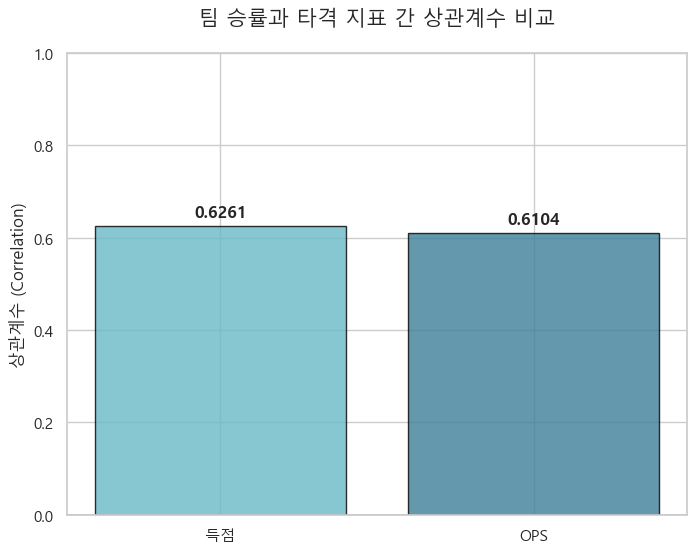

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 스타일 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='Malgun Gothic')

# [데이터 로드] 업로드된 final_master 사용
if 'final_master' in locals() or 'final_master' in globals():
    
    # 2. 분석 지표 설정 (타격)
    target = '승률'
    features = ['득점', 'OPS']
    
    # 3. 상관계수 계산
    correlations = final_master[[target] + features].corr()[target].drop(target)
    
    print("\n" + "="*50)
    print(f" [ {target} ] 기준 타격 지표별 상관계수")
    print("="*50)
    for idx, val in correlations.items():
        print(f" {target}  <--->  {idx:4s} : {val:8.4f}")
    print("="*50)

    # 4. 시각화: 상관관계 막대 그래프
    plt.figure(figsize=(8, 6))
    # 타격 지표는 긍정적인 신호이므로 파란색 계열 사용
    colors = sns.color_palette("GnBu_d", len(features))
    bars = plt.bar(correlations.index, correlations.values, color=colors, edgecolor='black', alpha=0.8)
    
    # 막대 위에 수치 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), 
                 va='bottom', ha='center', fontweight='bold')

    plt.title(f'팀 {target}과 타격 지표 간 상관계수 비교', fontsize=15, pad=20)
    plt.ylabel('상관계수 (Correlation)')
    plt.ylim(0, 1.0) # 타격은 양의 상관관계이므로 0~1 범위 설정
    plt.axhline(0, color='black', linewidth=1)
    plt.show()

else:
    print("❌ 'final_master' 데이터가 없습니다. 데이터 전처리 코드를 먼저 실행해 주세요.")


 [ 승률 ] 기준 수비 지표별 상관계수
 승률  <--->  실책   :  -0.2663 (영향력: 0.2663)
 승률  <--->  F%   :   0.3107 (영향력: 0.3107)


C:\Users\user\AppData\Local\Temp\ipykernel_19156\160024716.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual_val = correlations[i]


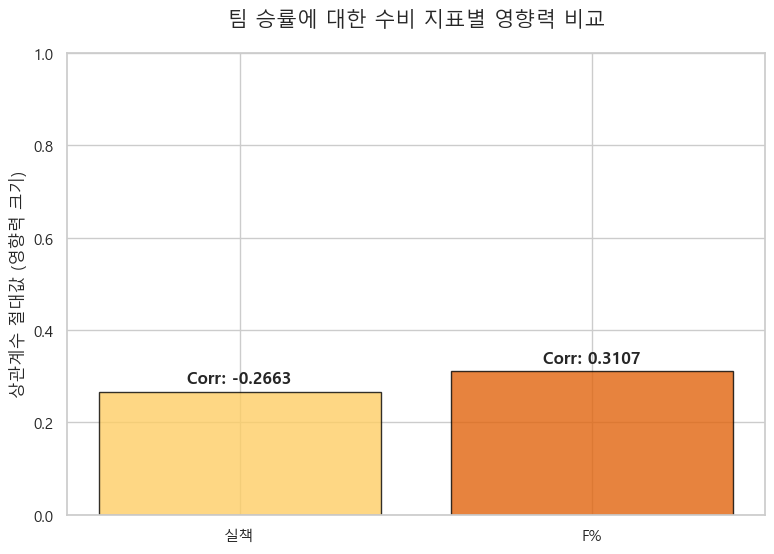

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 스타일 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='Malgun Gothic')

if 'final_master' in locals() or 'final_master' in globals():
    
    # 2. 분석 지표 설정 (수비)
    target = '승률'
    features = ['실책', 'F%']
    
    # 3. 상관계수 계산 및 영향력(절대값) 추출
    correlations = final_master[[target] + features].corr()[target].drop(target)
    abs_correlations = correlations.abs()
    
    print("\n" + "="*50)
    print(f" [ {target} ] 기준 수비 지표별 상관계수")
    print("="*50)
    for idx, val in correlations.items():
        print(f" {target}  <--->  {idx:4s} : {val:8.4f} (영향력: {abs(val):.4f})")
    print("="*50)

    # 4. 시각화: 상하 반전 막대 그래프 (영향력 크기 비교)
    plt.figure(figsize=(9, 6))
    colors = sns.color_palette("YlOrBr", len(features))
    bars = plt.bar(abs_correlations.index, abs_correlations.values, color=colors, edgecolor='black', alpha=0.8)
    
    # 막대 위에 실제 상관계수 표시
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        actual_val = correlations[i]
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"Corr: {actual_val:.4f}", 
                 va='bottom', ha='center', fontweight='bold')

    plt.title(f'팀 {target}에 대한 수비 지표별 영향력 비교', fontsize=15, pad=20)
    plt.ylabel('상관계수 절대값 (영향력 크기)')
    plt.ylim(0, 1.0)
    plt.show()

else:
    print("❌ 'final_master' 데이터가 없습니다. 데이터 전처리 코드를 먼저 실행해 주세요.")


 [ 승률 ] 기준 주루 지표 상관계수
 승률  <--->  SB%  :   0.0292


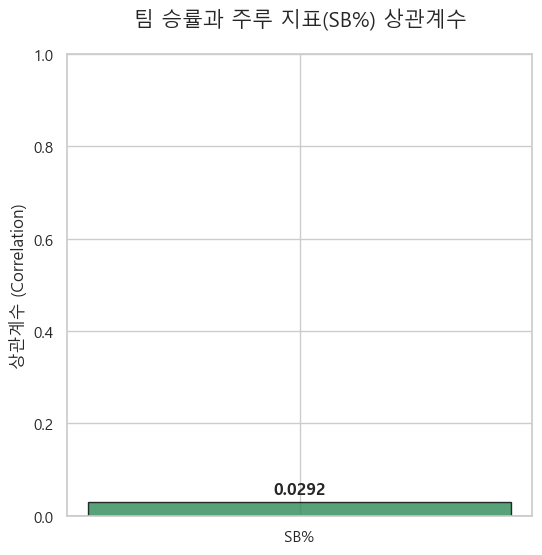

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 스타일 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='Malgun Gothic')

if 'final_master' in locals() or 'final_master' in globals():
    
    # 2. 분석 지표 설정 (주루)
    target = '승률'
    feature = 'SB%'
    
    # 3. 상관계수 계산
    correlation = final_master[[target, feature]].corr().loc[feature, target]
    
    print("\n" + "="*50)
    print(f" [ {target} ] 기준 주루 지표 상관계수")
    print("="*50)
    print(f" {target}  <--->  {feature:4s} : {correlation:8.4f}")
    print("="*50)

    # 4. 시각화: 타격/수비와 동일한 막대 그래프 형식
    plt.figure(figsize=(6, 6))
    
    # 주루는 양(+)의 상관관계이므로 초록색 계열 사용
    bar = plt.bar(feature, correlation, color='seagreen', edgecolor='black', alpha=0.8, width=0.5)
    
    # 막대 위에 수치 표시
    plt.text(0, correlation + 0.01, f"{correlation:.4f}", 
             va='bottom', ha='center', fontweight='bold', fontsize=12)

    plt.title(f'팀 {target}과 주루 지표(SB%) 상관계수', fontsize=15, pad=20)
    plt.ylabel('상관계수 (Correlation)')
    plt.ylim(0, 1.0) # 비교를 위해 Y축 범위를 0~1로 고정
    plt.axhline(0, color='black', linewidth=1)
    
    plt.show()

else:
    print("❌ 'final_master' 데이터가 없습니다. 데이터 전처리 코드를 먼저 실행해 주세요.")


 [ 승률 ] 기준 WAR 지표별 상관계수
 승률  <--->  WAR_pitcher :   0.8183
 승률  <--->  WAR_hitter  :   0.7861
 승률  <--->  WAR_total   :   0.9096


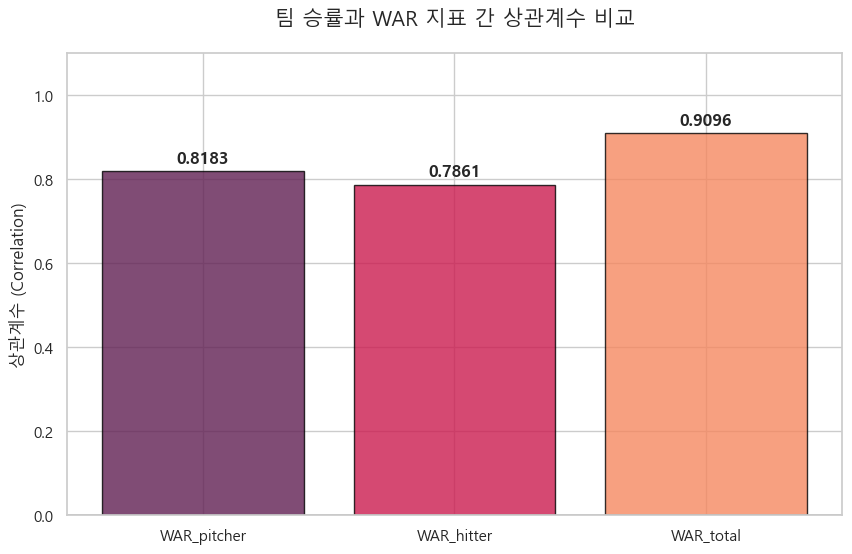

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. 한글 폰트 및 스타일 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", font='Malgun Gothic')

if 'final_master' in locals() or 'final_master' in globals():
    
    # 2. 분석 지표 설정 (WAR 관련 종합 지표)
    target = '승률'
    features = ['WAR_pitcher', 'WAR_hitter', 'WAR_total']
    
    # 3. 상관계수 계산
    correlations = final_master[[target] + features].corr()[target].drop(target)
    
    print("\n" + "="*50)
    print(f" [ {target} ] 기준 WAR 지표별 상관계수")
    print("="*50)
    for idx, val in correlations.items():
        print(f" {target}  <--->  {idx:11s} : {val:8.4f}")
    print("="*50)

    # 4. 시각화: 막대 그래프
    plt.figure(figsize=(10, 6))
    # 종합 지표이므로 강조를 위해 좀 더 짙은 색상 사용
    colors = sns.color_palette("rocket", len(features))
    bars = plt.bar(correlations.index, correlations.values, color=colors, edgecolor='black', alpha=0.8)
    
    # 막대 위에 수치 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), 
                 va='bottom', ha='center', fontweight='bold', fontsize=12)

    plt.title(f'팀 {target}과 WAR 지표 간 상관계수 비교', fontsize=15, pad=20)
    plt.ylabel('상관계수 (Correlation)')
    plt.ylim(0, 1.1) # WAR은 매우 높은 상관관계를 보이므로 1.1까지 설정
    plt.axhline(0, color='black', linewidth=1)
    
    plt.show()

else:
    print("❌ 'final_master' 데이터가 없습니다. 데이터 전처리 코드를 먼저 실행해 주세요.")